In [2]:
import zipfile
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

zip_path = "titanic.zip"     # <-- use the exact filename you uploaded

# Extract all files
with zipfile.ZipFile(zip_path, 'r') as z:
    z.extractall("titanic_data")

print("Extraction complete!")
os.listdir("titanic_data")


Extraction complete!


['gender_submission.csv', 'test.csv', 'train.csv']

In [45]:
train=pd.read_csv("titanic_data/train.csv")
test=pd.read_csv("titanic_data/test.csv")
gender= pd.read_csv("titanic_data/gender_submission.csv")

## TRAIN

In [47]:
df = train.copy()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [37]:
df["Ticket"].value_counts()

Ticket
347082              7
1601                7
CA. 2343            7
3101295             6
CA 2144             6
                   ..
PC 17590            1
17463               1
330877              1
373450              1
STON/O2. 3101282    1
Name: count, Length: 681, dtype: int64

In [38]:
df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

## Relationship

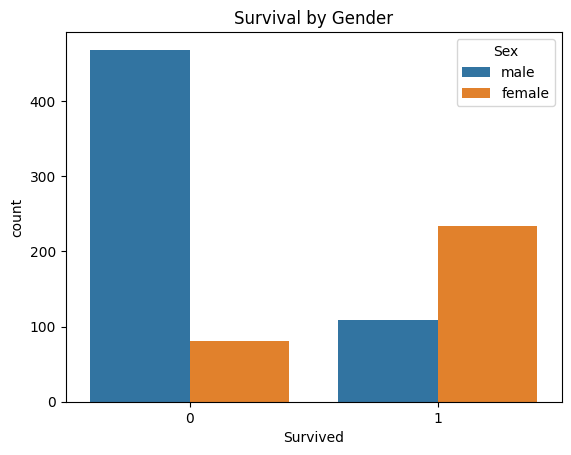

In [48]:
# Count plot
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title("Survival by Gender")
plt.show()

## Histogram

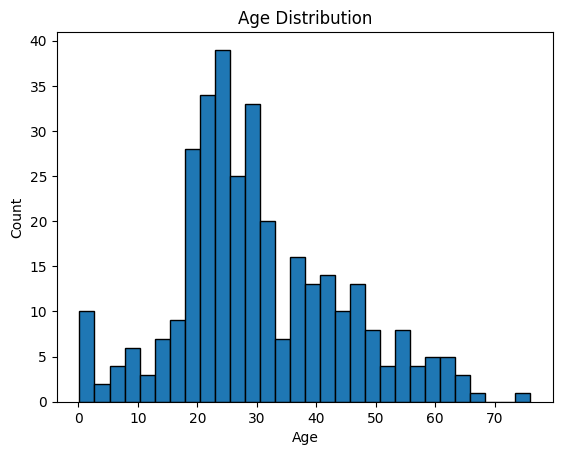

In [58]:
plt.hist(df['Age'].dropna(), bins=30, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()


## TEST

In [59]:
df = test.copy()
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [40]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [41]:
df["Sex"].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

## Relationship

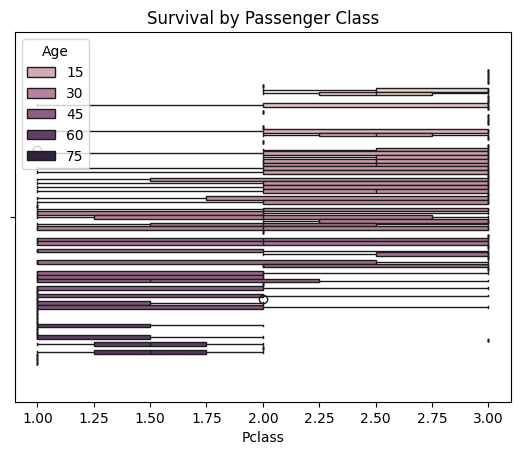

In [52]:
# Box plot
sns.boxplot(x='Pclass', hue='Age', data=df)
plt.title("Survival by Passenger Class")
plt.show()

## Histogram

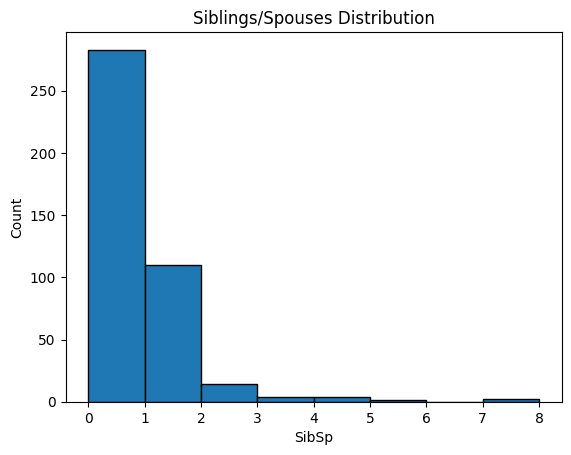

In [60]:
plt.hist(df['SibSp'], bins=8, edgecolor='black')
plt.xlabel('SibSp')
plt.ylabel('Count')
plt.title('Siblings/Spouses Distribution')
plt.show()

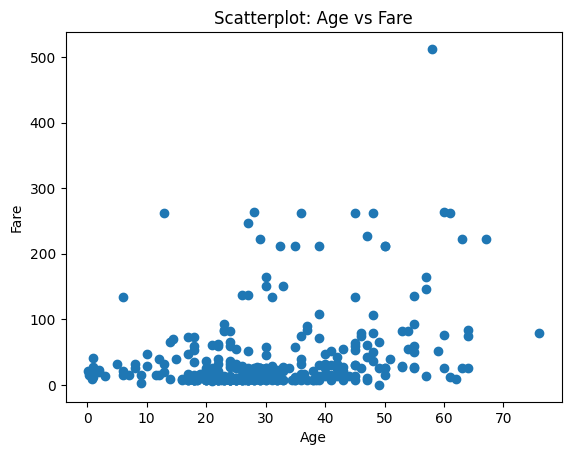

In [57]:
# Scatter plot
plt.scatter(df['Age'], df['Fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Scatterplot: Age vs Fare')
plt.show()

## GENDER_SUBMISSION

In [53]:
df=gender.copy()
df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [43]:
# for train
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


PassengerId    0
Survived       0
dtype: int64

In [44]:
df["PassengerId"].value_counts()

PassengerId
1309    1
892     1
1293    1
1292    1
1291    1
       ..
898     1
897     1
896     1
895     1
894     1
Name: count, Length: 418, dtype: int64

## OBSERVATIONS

# Exploratory Data Analysis – Titanic Dataset
## 1. Countplot: Survival by Gender (Train Set)

Observation:

Females have a much higher survival count compared to males.

Gender played a significant role in survival chances.

This reflects the “women and children first” evacuation priority during the disaster.

## 2. Histogram: Age Distribution (Train Set)

Observation:

Most passengers were aged 20–40 years.

There are fewer children (<10 years) and fewer elderly (>60 years).

The distribution is slightly right-skewed, with more younger passengers on board.

## 3. Boxplot: Fare by Passenger Class (Test Set)

Observation:

1st class passengers paid the highest fares with a wide variation.

3rd class passengers paid the lowest fares with a very narrow range.

Fare shows a clear relationship with socio-economic class.

## 4. Histogram: Sibling/Spouses (SibSp) Distribution (Test Set)

Observation:

Most passengers had 0 siblings/spouses on board.

Very few passengers traveled with large family groups.

This indicates that most passengers traveled alone.

# Summary of Findings (Based on Selected Visuals)

1. Gender and survival: The countplot shows that females had a much higher survival count than males, indicating gender played an important role in  survival chances.

2. Age distribution: The majority of passengers were between 20–40 years old, with fewer children and elderly individuals on board.

3. Fare differences across class: The boxplot indicates that 1st class passengers paid much higher fares, while 3rd class passengers paid the lowest, showing a clear fare–class relationship.

4. Family structure (SibSp): Most passengers traveled alone with 0 siblings or spouses, and only a few passengers had larger family groups.